# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#cities = ['novosibirsk','asdfa','kemerovo']
ncities=len(cities)
#set dictionary to store city weather data
citydata={}
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    print(f'processing record {cities.index(city)+1} of {ncities} | {city}')
    if weather_response.ok:
        weather_json = weather_response.json()
        citydata.setdefault('City',[]).append(weather_json['name'])
        citydata.setdefault('Lat',[]).append(weather_json['coord']['lat'])
        citydata.setdefault('Lng',[]).append(weather_json['coord']['lon'])
        citydata.setdefault('Max Temp',[]).append(weather_json['main']['temp_max'])
        citydata.setdefault('Humidity',[]).append(weather_json['main']['humidity'])
        citydata.setdefault('Cloudiness',[]).append(weather_json['clouds']['all'])
        citydata.setdefault('Wind Speed',[]).append(weather_json['wind']['speed'])
        citydata.setdefault('Country',[]).append(weather_json['sys']['country'])
        citydata.setdefault('Date',[]).append(weather_json['dt'])
    else:
        print(f'    request unsuccessful for city {city}, skipping')
    

processing record 1 of 636 | kapaa
processing record 2 of 636 | esperance
processing record 3 of 636 | qaanaaq
processing record 4 of 636 | cape town
processing record 5 of 636 | mehran
processing record 6 of 636 | pampa
processing record 7 of 636 | brae
processing record 8 of 636 | butaritari
processing record 9 of 636 | ajaccio
processing record 10 of 636 | bonthe
processing record 11 of 636 | iqaluit
processing record 12 of 636 | smithers
processing record 13 of 636 | punta arenas
processing record 14 of 636 | san carlos de bariloche
processing record 15 of 636 | ushuaia
processing record 16 of 636 | hobart
processing record 17 of 636 | boende
processing record 18 of 636 | busselton
processing record 19 of 636 | carnarvon
processing record 20 of 636 | geraldton
processing record 21 of 636 | dikson
processing record 22 of 636 | havoysund
processing record 23 of 636 | san jeronimo
processing record 24 of 636 | san andres
processing record 25 of 636 | nusaybin
processing record 26 of 6

processing record 194 of 636 | severo-kurilsk
processing record 195 of 636 | alghero
processing record 196 of 636 | sentyabrskiy
    request unsuccessful for city sentyabrskiy, skipping
processing record 197 of 636 | tsihombe
    request unsuccessful for city tsihombe, skipping
processing record 198 of 636 | raudeberg
processing record 199 of 636 | robore
processing record 200 of 636 | batticaloa
processing record 201 of 636 | arys
processing record 202 of 636 | resistencia
processing record 203 of 636 | warren
processing record 204 of 636 | mahebourg
processing record 205 of 636 | ban dung
processing record 206 of 636 | moose factory
processing record 207 of 636 | saskylakh
processing record 208 of 636 | thuro
    request unsuccessful for city thuro, skipping
processing record 209 of 636 | provideniya
processing record 210 of 636 | warqla
    request unsuccessful for city warqla, skipping
processing record 211 of 636 | toliary
    request unsuccessful for city toliary, skipping
proces

processing record 372 of 636 | marquette
processing record 373 of 636 | roald
processing record 374 of 636 | hamilton
processing record 375 of 636 | hambantota
processing record 376 of 636 | zlatoustovsk
    request unsuccessful for city zlatoustovsk, skipping
processing record 377 of 636 | san francisco de macoris
processing record 378 of 636 | atbasar
processing record 379 of 636 | vanimo
processing record 380 of 636 | mareeba
processing record 381 of 636 | bambanglipuro
processing record 382 of 636 | rawson
processing record 383 of 636 | sarh
processing record 384 of 636 | okhotsk
processing record 385 of 636 | hualmay
processing record 386 of 636 | gwanda
processing record 387 of 636 | progreso
processing record 388 of 636 | los llanos de aridane
processing record 389 of 636 | castro
processing record 390 of 636 | chicama
processing record 391 of 636 | puerto baquerizo moreno
processing record 392 of 636 | mackay
processing record 393 of 636 | kieta
processing record 394 of 636 | a

processing record 554 of 636 | lata
processing record 555 of 636 | sesheke
processing record 556 of 636 | mugur-aksy
processing record 557 of 636 | xining
processing record 558 of 636 | diamantino
processing record 559 of 636 | pandan
processing record 560 of 636 | karla
processing record 561 of 636 | plettenberg bay
processing record 562 of 636 | ranot
processing record 563 of 636 | saint-denis
processing record 564 of 636 | kysyl-syr
processing record 565 of 636 | eyl
processing record 566 of 636 | chute-aux-outardes
processing record 567 of 636 | luderitz
processing record 568 of 636 | poddorye
processing record 569 of 636 | miedzychod
processing record 570 of 636 | turukhansk
processing record 571 of 636 | dolbeau
    request unsuccessful for city dolbeau, skipping
processing record 572 of 636 | lincoln
processing record 573 of 636 | marau
processing record 574 of 636 | tucupita
processing record 575 of 636 | ilulissat
processing record 576 of 636 | chavakkad
processing record 577 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
citydata_df=pd.DataFrame.from_dict(citydata)
citydata_df.to_csv(output_data_file, index=False)
citydata_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,26.18,76,90,0.89,US,1629912860
1,Esperance,-33.8667,121.9000,12.91,49,86,8.94,AU,1629912860
2,Qaanaaq,77.4840,-69.3632,4.72,85,100,4.78,GL,1629912861
3,Cape Town,-33.9258,18.4232,14.51,82,0,0.89,ZA,1629912861
4,Mehrān,33.1222,46.1646,36.71,9,0,4.29,IR,1629912861


In [53]:
#Read previously stored data from csv to avoid repeaded api requests
citydata_df = pd.read_csv(output_data_file)
citydata_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,26.18,76,90,0.89,US,1629912860
1,Esperance,-33.8667,121.9000,12.91,49,86,8.94,AU,1629912860
2,Qaanaaq,77.4840,-69.3632,4.72,85,100,4.78,GL,1629912861
3,Cape Town,-33.9258,18.4232,14.51,82,0,0.89,ZA,1629912861
4,Mehrān,33.1222,46.1646,36.71,9,0,4.29,IR,1629912861


In [54]:
# print dataframe statistics
def q50(x):
    return x.quantile(0.5)
def q25(x):
    return x.quantile(0.25)
def q75(x):
    return x.quantile(0.75)

citydata_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].agg(['count','mean','std','min',q25,q50,q75,'max'])

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,20.452586,20.430416,21.033908,68.035836,51.587031,3.434283,1.629913e+09
std,33.646697,90.863877,8.913518,23.365994,38.252692,2.361809,8.240440e+01
min,-54.800000,-179.166700,0.010000,5.000000,0.000000,0.000000,1.629913e+09
q25,-8.064750,-61.837075,13.462500,54.250000,12.000000,1.790000,1.629913e+09
q50,24.910650,25.676700,22.355000,75.000000,51.000000,2.960000,1.629913e+09
q75,49.095925,103.246175,27.225000,86.000000,90.000000,4.652500,1.629913e+09
max,78.218600,179.316700,42.430000,100.000000,100.000000,14.850000,1.629913e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
#  Get the indices of cities that have humidity over 100%.
humidity_drop_idx=citydata_df[citydata_df['Humidity']>100].index

In [56]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_citydata_df=citydata_df.drop(humidity_drop_idx, inplace=False)
clean_citydata_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].agg(['count','mean','std','min',q25,q50,q75,'max'])

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,20.452586,20.430416,21.033908,68.035836,51.587031,3.434283,1.629913e+09
std,33.646697,90.863877,8.913518,23.365994,38.252692,2.361809,8.240440e+01
min,-54.800000,-179.166700,0.010000,5.000000,0.000000,0.000000,1.629913e+09
q25,-8.064750,-61.837075,13.462500,54.250000,12.000000,1.790000,1.629913e+09
q50,24.910650,25.676700,22.355000,75.000000,51.000000,2.960000,1.629913e+09
q75,49.095925,103.246175,27.225000,86.000000,90.000000,4.652500,1.629913e+09
max,78.218600,179.316700,42.430000,100.000000,100.000000,14.850000,1.629913e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [76]:
# calculate current date string
time_string = time.strftime("%m/%d/%Y", time.localtime())
print(time_string)

08/27/2021


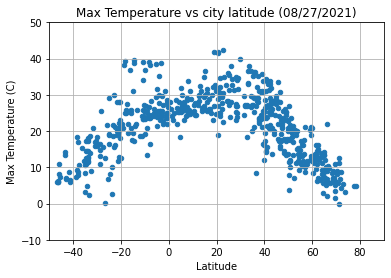

In [77]:

clean_citydata_df.plot.scatter(x='Lat', y='Max Temp', xlabel='Latitude', ylabel='Max Temperature (C)',title=f'Max Temperature vs city latitude ({time_string})',grid='True',xlim=(-50,90),ylim=(-10,50)).get_figure().savefig('output_data/temp_vs_lat.png')


## Latitude vs. Humidity Plot

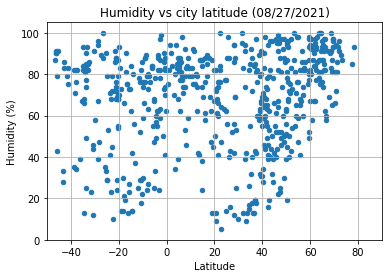

In [78]:
clean_citydata_df.plot.scatter(x='Lat', y='Humidity', xlabel='Latitude', ylabel='Humidity (%)',title=f'Humidity vs city latitude ({time_string})',grid='True',xlim=(-50,90),ylim=(0,105)).get_figure().savefig('output_data/humid_vs_lat.png')

## Latitude vs. Cloudiness Plot

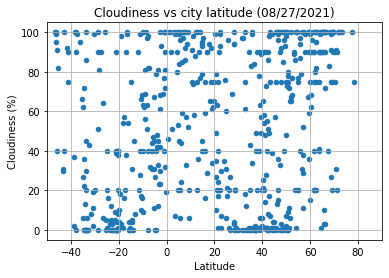

In [79]:
clean_citydata_df.plot.scatter(x='Lat', y='Cloudiness', xlabel='Latitude', ylabel='Cloudiness (%)',title=f'Cloudiness vs city latitude ({time_string})',grid='True',xlim=(-50,90),ylim=(-5,105)).get_figure().savefig('output_data/cloud_vs_lat.png')

## Latitude vs. Wind Speed Plot

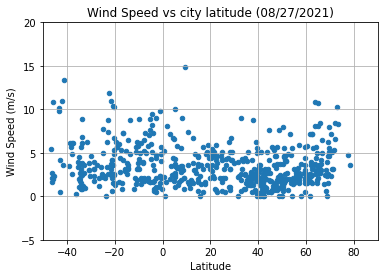

In [80]:
clean_citydata_df.plot.scatter(x='Lat', y='Wind Speed', xlabel='Latitude', ylabel='Wind Speed (m/s)',title=f'Wind Speed vs city latitude ({time_string})',grid='True',xlim=(-50,90),ylim=(-5,20)).get_figure().savefig('output_data/wind_speed_vs_lat.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.739


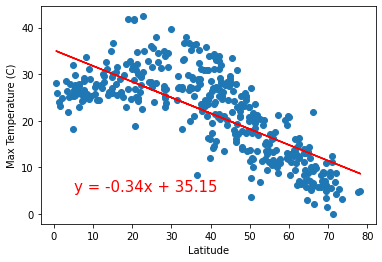

In [67]:
x_values = clean_citydata_df[clean_citydata_df['Lat']>0]['Lat']
y_values = clean_citydata_df[clean_citydata_df['Lat']>0]['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is {round(rvalue,3)}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig('output_data/temp_vs_lat_north_regression.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.748


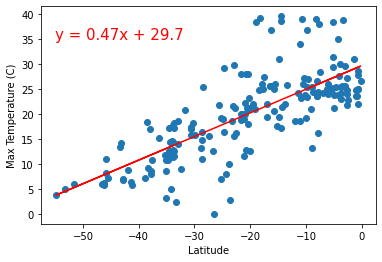

In [68]:
x_values = clean_citydata_df[clean_citydata_df['Lat']<0]['Lat']
y_values = clean_citydata_df[clean_citydata_df['Lat']<0]['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is {round(rvalue,3)}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig('output_data/temp_vs_lat_south_regression.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.179


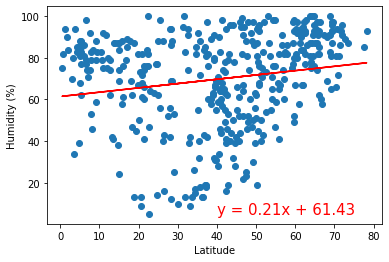

In [69]:
x_values = clean_citydata_df[clean_citydata_df['Lat']>0]['Lat']
y_values = clean_citydata_df[clean_citydata_df['Lat']>0]['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is {round(rvalue,3)}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/humid_vs_lat_north_regression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.067


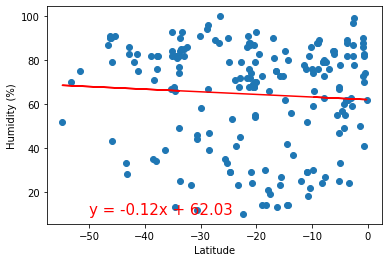

In [70]:
x_values = clean_citydata_df[clean_citydata_df['Lat']<0]['Lat']
y_values = clean_citydata_df[clean_citydata_df['Lat']<0]['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is {round(rvalue,3)}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/humid_vs_lat_south_regression.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.096


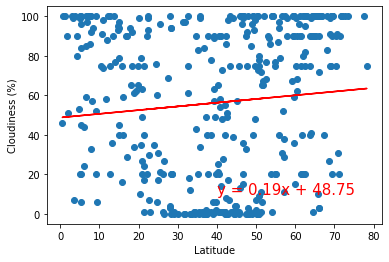

In [71]:
x_values = clean_citydata_df[clean_citydata_df['Lat']>0]['Lat']
y_values = clean_citydata_df[clean_citydata_df['Lat']>0]['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is {round(rvalue,3)}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim=(-5,105)
plt.savefig('output_data/cloud_vs_lat_north_regression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.007


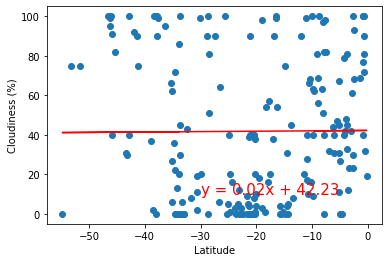

In [72]:
x_values = clean_citydata_df[clean_citydata_df['Lat']<0]['Lat']
y_values = clean_citydata_df[clean_citydata_df['Lat']<0]['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is {round(rvalue,3)}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim=(-5,105)
plt.savefig('output_data/cloud_vs_lat_south_regression.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.027


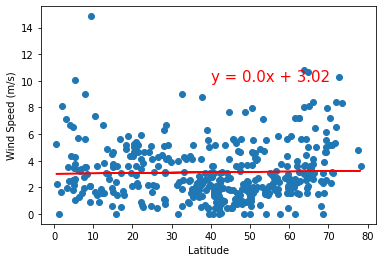

In [73]:
x_values = clean_citydata_df[clean_citydata_df['Lat']>0]['Lat']
y_values = clean_citydata_df[clean_citydata_df['Lat']>0]['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is {round(rvalue,3)}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.ylim=(-5,20)
plt.savefig('output_data/wind_vs_lat_north_regression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.044


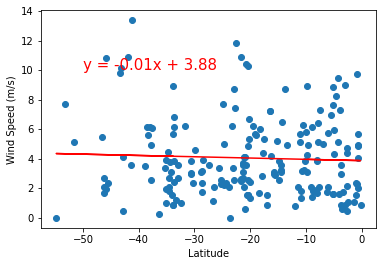

In [74]:
x_values = clean_citydata_df[clean_citydata_df['Lat']<0]['Lat']
y_values = clean_citydata_df[clean_citydata_df['Lat']<0]['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is {round(rvalue,3)}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.ylim=(-5,20)
plt.savefig('output_data/wind_vs_lat_south_regression.png')
plt.show()

####  Observations

* Temperature decreases with increasing latitude (or if you get firther from equator)
* In the northern hemisphere Themerature actually first increases as you get from the equator and then starts to decrease. This probably due to desert climate in Africa as you can see lowest humidity points at the same latitude come from there
* Wind speed does not correlate with latitude in both hemispheres
* Cloudiness does not corelate with latitude in the Southern hemisphere but increases with latitude in the Norther hemisphere. This is probably due to the fact that there is more land in the Northern hemisphere